This example demonstrates how to simulate steady channel flow in **20 lines of code!** We recommend using a Python notebook (`.ipynb`) for an interactive experience.

### 1. Define the Geometry and Physics

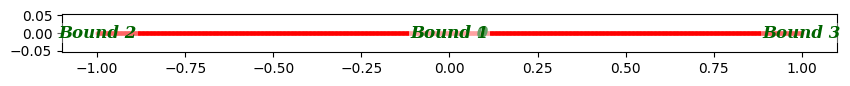

In [1]:
import deepflow as df
df.manual_seed(69)

# Create a 5x1 rectangle
line1 = df.geometry.line_horizontal(y = 0, range_x= [-1, 1])
line2 = df.geometry.line_horizontal(y = 0, range_x= [-1, 1])
point1 = df.geometry.point(x=-1, y=0)
point2 = df.geometry.point(x=1, y=0)
domain = df.domain(line1, line2, point1, point2)#, rectangle2.area_list)
domain.show_setup()

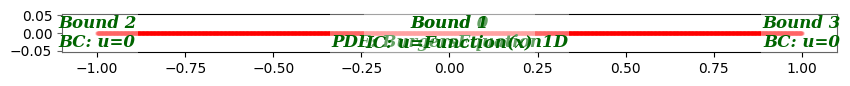

In [2]:
# Define Boundary Conditions
#domain.bound_list[0].define_bc({'u': 0})   # Inflow: u=1
#domain.bound_list[1].define_bc({'u': 1})  # Wall: No slip
#domain.bound_list[2].define_bc({'u': 1})          # Outflow: p=0
#domain.bound_list[3].define_bc({'u': 0})  # Wall: No slip

# Define PDE (Navier-Stokes)
import torch
domain.bound_list[0].define_pde(df.pde.BurgersEquation1D(nu=0.01))
domain.bound_list[1].define_ic({'u':['x', lambda x: -torch.sin(torch.pi * x)]})
domain.bound_list[2].define_bc({'u': 0})
domain.bound_list[3].define_bc({'u': 0})
# Transient Flow
#domain.area_list[0].define_ic({'u': 0})
domain.show_setup()
for geometry in domain:
    geometry.define_time(range_t = [0, 1], sampling_scheme = "random", expo_scaling=True)

### 2. Generate Training Data

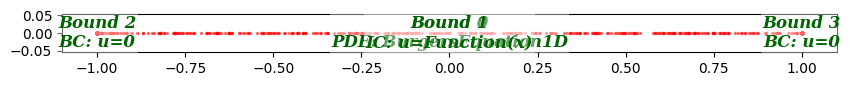

In [3]:
# Sample points: [Left, Bottom, Right, Top], [Interior]
domain.sampling_random([200,200,200,200])
domain.show_coordinates(display_conditions=True)

### 3. Create and Train the Model

In [4]:
def func(epoch, model):
    if epoch % 100 == 0 and epoch > 0:
        domain.sampling_RAR(model, [200,200,1000,1000], [], [2000,2000,2000,2000], [])
        print(domain)

In [5]:
model0 = df.PINN(input_vars=['x', 't'], width=32, length=4)

model1, model1_best = model0.train_adam(
    calc_loss = df.calc_loss_simple(domain),
    learning_rate=0.001,
    epochs=2000,
    do_between_epochs=func,
)

Epoch: 1, total_loss: 0.54965, bc_loss: 0.01325, pde_loss: 0.00001, ic_loss: 0.53639
number of bound : ['0: 400', '1: 400', '2: 1200', '3: 1200']

        number of area : []
number of bound : ['0: 600', '1: 600', '2: 2200', '3: 2200']

        number of area : []
Epoch: 200, total_loss: 0.36720, bc_loss: 0.00895, pde_loss: 0.09946, ic_loss: 0.25879
Training interrupted by user.


In [ ]:
print(domain)

number of bound : ['0: 200', '1: 200', '2: 200', '3: 200']

        number of area : []


In [ ]:
model2_best = model1_best.train_lbfgs(calc_loss = df.calc_loss_simple(domain), epochs=200, do_between_epochs=func)

Epoch: 2000, total_loss: 0.00725, bc_loss: 0.00028, pde_loss: 0.00444, ic_loss: 0.00254
Epoch: 2050, total_loss: 0.00001, bc_loss: 0.00000, pde_loss: 0.00001, ic_loss: 0.00000
Epoch: 2100, total_loss: 0.00118, bc_loss: 0.00001, pde_loss: 0.00113, ic_loss: 0.00004
Epoch: 2150, total_loss: 0.00001, bc_loss: 0.00000, pde_loss: 0.00000, ic_loss: 0.00000


### 4. Visualize Results

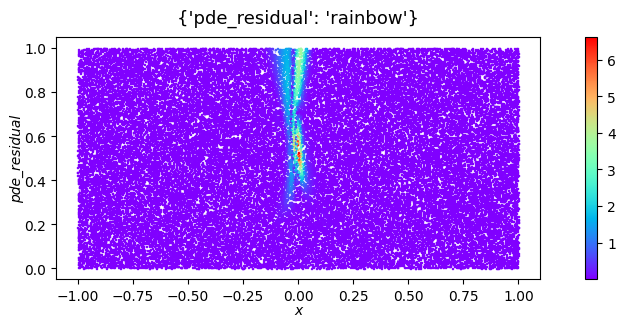

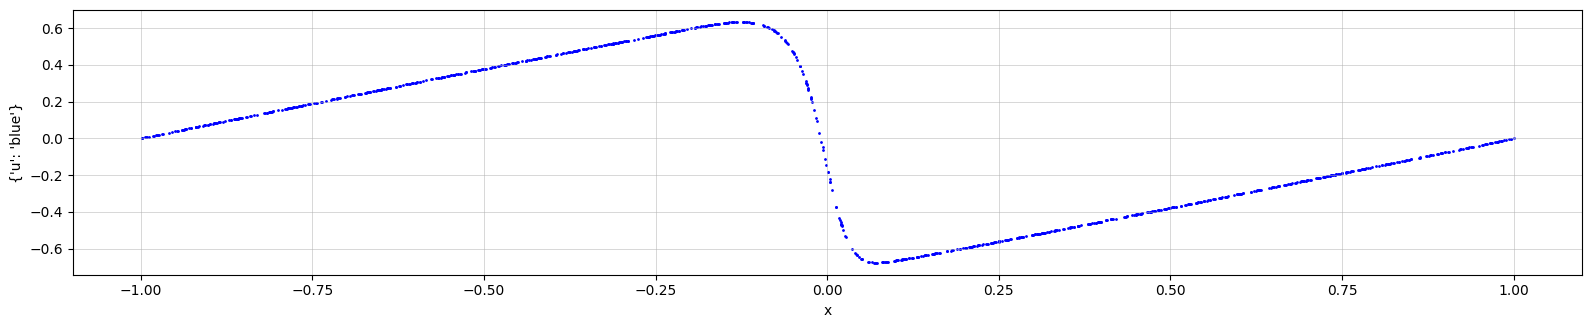

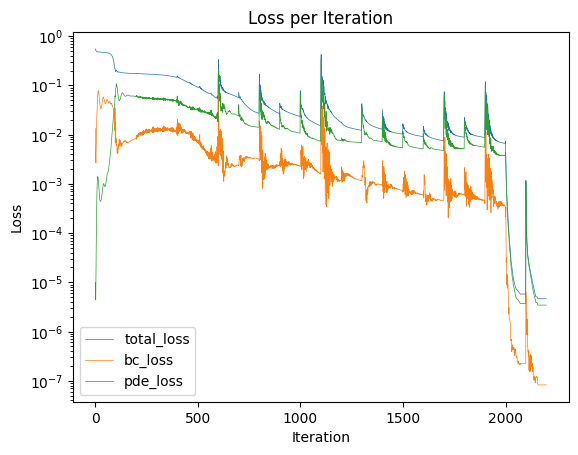

In [ ]:
# Evaluate the best model
prediction = domain.bound_list[0].evaluate(model2_best)
prediction.sampling_line(50000, random=True)
prediction.define_time([0,1], sampling_scheme="random")

# Plot Velocity Field
_ = prediction.plot_color({'pde_residual':'rainbow'}, y_axis='t', s=0.5)

prediction.sampling_line(1000, random=True)
prediction.define_time(0.99, sampling_scheme="uniform")
_ = prediction.plot(y_axis={'u':'blue'}, x_axis='x')

# Plot Training Loss
_ =prediction.plot_loss_curve(log_scale=True)

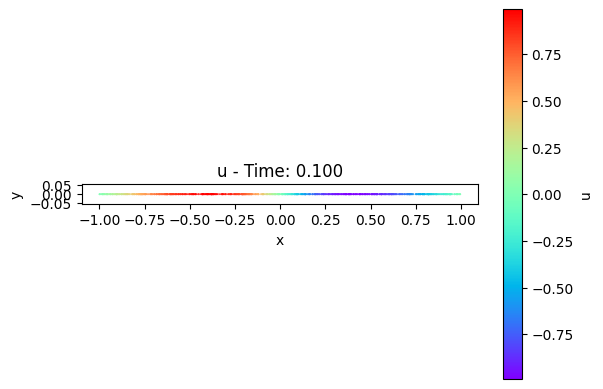

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
a = prediction.plot_animate(color_axis={'u':'rainbow'}, x_axis='x', y_axis='y', range_t=[0.1, 1], dt=0.1, frame_interval=200)
a.save('animation.gif')

In [ ]:
print(prediction.geometry.inputs_tensor_dict['t'])

tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 